In [1]:
%run -m celldom.nb.logging

In [2]:
import os
import os.path as osp
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pandas as pd
from celldom.core import cytometry
from celldom.config import experiment_config
from celldom.dataset import marker_dataset
import celldom

In [3]:
config = experiment_config.ExperimentConfig(celldom.get_config('experiment', 'experiment_example_01'))

In [4]:
config.field_names

['cohort', 'datetime', 'street', 'apartment', 'concentration', 'chip', 'z']

In [5]:
config.path_regex

'.*(?P<datetime>[0-9.]{15}) MOLM13 (?P<cohort>NoDrug|1nMQuiz) (?P<concentration>1Mperml) (?P<chip>Chip2)/BF_ST_(?P<street>[0-9]{3})_APT_(?P<apartment>[0-9]{3})_(?P<z>z[_mp][0-9]{1}).tif'

In [6]:
config.parse_path('2018.05.31.1610 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_zm3.tif')

{'apartment': '000',
 'chip': 'Chip2',
 'cohort': 'NoDrug',
 'concentration': '1Mperml',
 'datetime': Timestamp('2018-05-31 16:10:00'),
 'street': '000',
 'z': 'zm3'}

In [7]:
import imp
imp.reload(cytometry)

<module 'celldom.core.cytometry' from '/lab/repos/celldom/python/source/celldom/core/cytometry.py'>

In [8]:
cytometer = cytometry.Cytometer(config, '/tmp/test')

In [9]:
cytometer.initialize()

Using TensorFlow backend.
2018-07-03 19:25:38,682:WARNING:tensorflow: From /usr/local/lib/python3.5/dist-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:198: retry (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Use the retry module or similar alternatives.
2018-07-03 19:25:53,824:INFO:tensorflow: Restoring parameters from /lab/data/celldom/.celldom/cache/models/pretrained/miq/model.ckpt-1000042


In [10]:
exp_dir = '2018.05.31.1610 MOLM13 NoDrug 1Mperml Chip2'
path = osp.join(celldom.get_data_dir(), 'dataset', 'dataset03', exp_dir)
path

'/lab/data/celldom/dataset/dataset03/2018.05.31.1610 MOLM13 NoDrug 1Mperml Chip2'

In [11]:
#!find "$path" | head -n 20

In [25]:
img_path = osp.join(path, 'BF_ST_000_APT_000_z_0.tif')
#img_path = osp.join(path, 'BF_ST_000_APT_000_zp3.tif')
img_path

'/lab/data/celldom/dataset/dataset03/2018.05.31.1610 MOLM13 NoDrug 1Mperml Chip2/BF_ST_000_APT_000_z_0.tif'

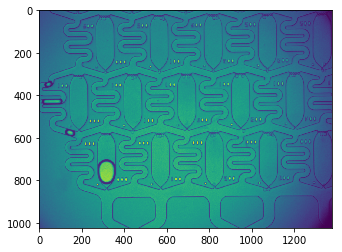

In [26]:
plt.imshow(io.imread(img_path))

In [27]:
acq = cytometry.Acquisition(img_path)

In [28]:
img = acq.load_image(marker_dataset.MarkerDataset)

In [29]:
img.shape

(1024, 1376, 3)

In [30]:
%pdb OFF
acq_data, apt_data, cell_data = cytometer.analyze(acq)

Automatic pdb calling has been turned OFF


/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "
/usr/local/lib/python3.5/dist-packages/skimage/measure/_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
/usr/local/lib/python3.5/dist-packages/skimage/measure/_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://sc

In [31]:
cytometer.save(acq_data, apt_data, cell_data)

In [24]:
cytometer.datastore.store.flush()

In [18]:
acq_data

,acq_apartment,acq_chip,acq_cohort,acq_concentration,acq_datetime,acq_id,acq_processed_at,acq_street,acq_z,apt_count,raw_image_path,raw_image_shape_height,raw_image_shape_width,raw_norm_image,rotation,scale
0,000,Chip2,NoDrug,1Mperml,2018-05-31 16:10:00,5a0c0a21b9f10e6ce1f260be2aa4e495,2018-07-03 19:25:54,000,zp3,13,/lab/data/celldom/dataset/dataset03/2018.05.31...,1024,1376,None,0.578635,253.676012


In [19]:
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 16 columns):
acq_apartment             1 non-null object
acq_chip                  1 non-null object
acq_cohort                1 non-null object
acq_concentration         1 non-null object
acq_datetime              1 non-null datetime64[ns]
acq_id                    1 non-null object
acq_processed_at          1 non-null datetime64[ns]
acq_street                1 non-null object
acq_z                     1 non-null object
apt_count                 1 non-null int64
raw_image_path            1 non-null object
raw_image_shape_height    1 non-null int64
raw_image_shape_width     1 non-null int64
raw_norm_image            0 non-null object
rotation                  1 non-null float64
scale                     1 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(3), object(9)
memory usage: 208.0+ bytes


In [20]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 40 columns):
acq_apartment             13 non-null object
acq_chip                  13 non-null object
acq_cohort                13 non-null object
acq_concentration         13 non-null object
acq_datetime              13 non-null datetime64[ns]
acq_id                    13 non-null object
acq_processed_at          13 non-null datetime64[ns]
acq_street                13 non-null object
acq_z                     13 non-null object
apt_id                    13 non-null int64
apt_image                 0 non-null object
apt_image_height          13 non-null int64
apt_image_width           13 non-null int64
apt_num                   13 non-null object
apt_num_digit_images      0 non-null object
apt_num_digit_scores      13 non-null object
apt_num_image             0 non-null object
cell_area_mean            12 non-null float64
cell_area_p10             12 non-null float64
cell_area_p50             12 n

In [21]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53 entries, 0 to 3
Data columns (total 23 columns):
acq_apartment        53 non-null object
acq_chip             53 non-null object
acq_cohort           53 non-null object
acq_concentration    53 non-null object
acq_datetime         53 non-null datetime64[ns]
acq_id               53 non-null object
acq_processed_at     53 non-null datetime64[ns]
acq_street           53 non-null object
acq_z                53 non-null object
apt_id               53 non-null int64
apt_num              53 non-null object
area                 53 non-null float64
cell_image           0 non-null object
centroid_x           53 non-null float64
centroid_y           53 non-null float64
eccentricity         53 non-null float64
roi_xmax             53 non-null float64
roi_xmin             53 non-null float64
roi_ymax             53 non-null float64
roi_ymin             53 non-null float64
score                53 non-null float64
solidity             53 non-null fl